In [14]:
import requests

response = requests.get('http://localhost:8000/v1/health/')

print(response.json())

{'healthy': True}


In [15]:
params = {
        "city_name": "Dubai",
    }

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_baseline_emissions', params=params)

# Print the response
print(response.json())

{'textiles': {'1960.0': 0.0, '1961.0': 0.0, '1962.0': 0.0, '1963.0': 0.0, '1964.0': 0.0, '1965.0': 0.0, '1966.0': 0.0, '1967.0': 0.0, '1968.0': 0.0, '1969.0': 0.0, '1970.0': 0.0, '1971.0': 0.0, '1972.0': 0.0, '1973.0': 0.0, '1974.0': 0.0, '1975.0': 0.0, '1976.0': 0.0, '1977.0': 0.0, '1978.0': 0.0, '1979.0': 0.0, '1980.0': 0.0, '1981.0': 0.0, '1982.0': 0.0, '1983.0': 0.0, '1984.0': 0.0, '1985.0': 0.0, '1986.0': 0.0, '1987.0': 0.0, '1988.0': 0.0, '1989.0': 0.0, '1990.0': 0.0, '1991.0': 0.0, '1992.0': 0.0, '1993.0': 0.0, '1994.0': 0.0, '1995.0': 0.0, '1996.0': 0.0, '1997.0': 0.0, '1998.0': 0.0, '1999.0': 0.0, '2000.0': 0.0, '2001.0': 0.0, '2002.0': 0.0, '2003.0': 0.0, '2004.0': 0.0, '2005.0': 0.0, '2006.0': 0.0, '2007.0': 0.0, '2008.0': 0.0, '2009.0': 0.0, '2010.0': 0.0, '2011.0': 0.0, '2012.0': 0.0, '2013.0': 0.0, '2014.0': 0.0, '2015.0': 0.0, '2016.0': 0.0, '2017.0': 0.0, '2018.0': 0.0, '2019.0': 0.0, '2020.0': 0.0, '2021.0': 0.0, '2022.0': 0.0, '2023.0': 0.0, '2024.0': 0.0, '2025.0': 0

In [16]:
baseline_emissions = response.json()['total']

In [17]:
params = {
        "city_name": "Dubai",
    }

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_baseline_parameters', params=params)

# Print the response
print(response.json())

{'div_fractions': {'compost': 0.0, 'anaerobic': 0.0, 'combustion': 0.0, 'recycling': 0.25}, 'landfill_pct': 1.0, 'gas_pct': 1.0}


In [18]:
baseline_compost = response.json()['div_fractions']['compost']
baseline_anaerobic = response.json()['div_fractions']['anaerobic']
baseline_combustion = response.json()['div_fractions']['combustion']
baseline_recycling = response.json()['div_fractions']['recycling']
baseline_landfill_pct = response.json()['landfill_pct']
baseline_gas_pct = response.json()['gas_pct']

Loop for composting 10.0 % took: 0.16 seconds
Loop for composting 20.0 % took: 0.13 seconds
Loop for composting 30.0 % took: 0.13 seconds


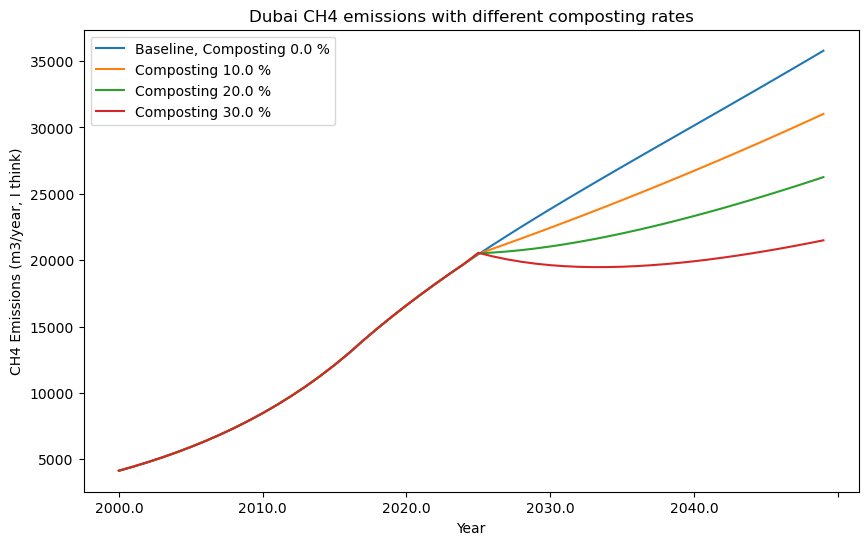

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# Create a range of compost values
compost_range = [0.1, 0.2, 0.3]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get baseline data
col = pd.Series(baseline_emissions)['2000':'2050'].copy()

# Plot the baseline
col.plot(label=f'Baseline, Composting {baseline_compost * 100} %')

data_dict = {"Baseline": col}

for c in compost_range:
    # Start the timer
    start_time = time.time()

    # Define the parameters
    params = {
        "city_name": "Dubai",
        "new_compost": c,
        "new_anaerobic": baseline_anaerobic,
        "new_combustion": baseline_combustion,
        "new_recycling": baseline_recycling,
        "new_landfill_pct": baseline_landfill_pct,
        "new_gas_pct": baseline_gas_pct,
        "implement_year": 2025
    }

    # Make the API request
    response = requests.get('http://localhost:8000/v1/city_emissions/city_implement_dst_changes', params=params)

    # Print the response
    #print(response.json())
    
    new_col = pd.DataFrame(response.json()).loc['2000':'2050', 'total'].copy()
    new_col.plot(label=f'Composting {c * 100} %')

    data_dict[f'Composting {c * 100} %'] = new_col

    # End the timer and print the elapsed time
    elapsed_time = time.time() - start_time
    print(f"Loop for composting {c * 100} % took: {elapsed_time:.2f} seconds")

plt.xlabel('Year')
plt.ylabel('CH4 Emissions (m3/year, I think)')
plt.title('Dubai CH4 emissions with different composting rates')
plt.legend(loc='best')

plt.show()

data = pd.DataFrame(data_dict)

In [7]:
response

<Response [500]>

In [127]:
data['diff_1'] = data['Baseline'] - data['Composting 10.0 %']
data['diff_2'] = data['Baseline'] - data['Composting 20.0 %']
data['diff_3'] = data['Baseline'] - data['Composting 30.0 %']
data

,Baseline,Composting 10.0 %,Composting 20.0 %,Composting 30.0 %,diff_1,diff_2,diff_3
2000,1.160645e+05,116064.493259,116064.493259,116064.493259,0.000000,0.000000,0.000000
2001,1.247129e+05,124712.899778,124712.899778,124712.899778,0.000000,0.000000,0.000000
2002,1.339944e+05,133994.355034,133994.355034,133994.355034,0.000000,0.000000,0.000000
2003,1.439556e+05,143955.597206,143955.597206,143955.597206,0.000000,0.000000,0.000000
2004,1.546468e+05,154646.790025,154646.790025,154646.790025,0.000000,0.000000,0.000000
2005,1.661218e+05,166121.775972,166121.775972,166121.775972,0.000000,0.000000,0.000000
2006,1.784383e+05,178438.347987,178438.347987,178438.347987,0.000000,0.000000,0.000000
2007,1.916585e+05,191658.541070,191658.541070,191658.541070,0.000000,0.000000,0.000000
2008,2.058489e+05,205848.945243,205848.945243,205848.945243,0.000000,0.000000,0.000000
2009,2.210810e+05,221081.041455,221081.041455,221081.041455,0.000000,0.000000,0.000000


Update took: 0.13 seconds
Update took: 0.13 seconds


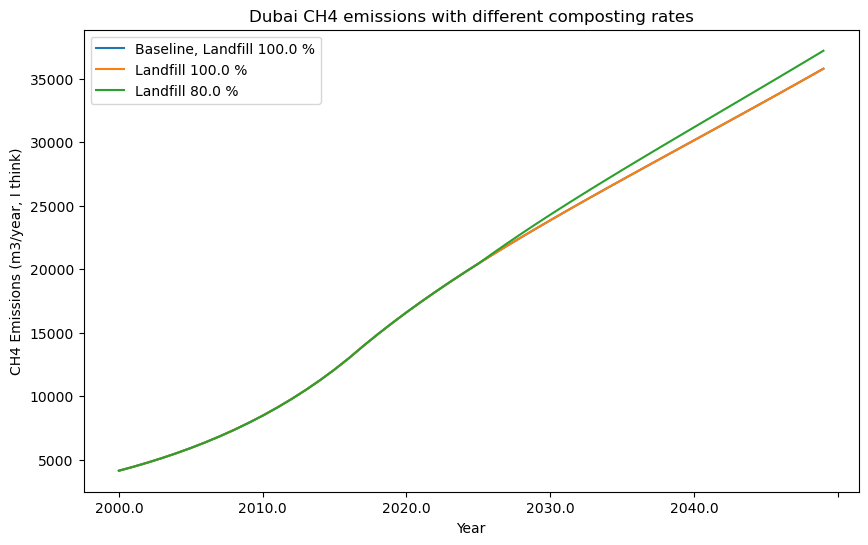

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import time

new_landfill_pct = .8

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get baseline data
col = pd.Series(baseline_emissions)['2000':'2050'].copy()

# Plot the baseline
col.plot(label=f'Baseline, Landfill {baseline_landfill_pct * 100} %')

data_dict = {"Baseline": col}

# Start the timer
start_time = time.time()

# Define the parameters
params = {
    "city_name": "Dubai",
    "new_compost": baseline_compost,
    "new_anaerobic": baseline_anaerobic,
    "new_combustion": baseline_combustion,
    "new_recycling": baseline_recycling,
    "new_landfill_pct": baseline_landfill_pct,
    "new_gas_pct": baseline_gas_pct,
    "implement_year": 2025
}

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_implement_dst_changes', params=params)

# Print the response
#print(response.json())

new_col = pd.DataFrame(response.json()).loc['2000':'2050', 'total'].copy()
new_col.plot(label=f'Landfill {baseline_landfill_pct * 100} %')

data_dict[str(new_landfill_pct)] = new_col

# End the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Update took: {elapsed_time:.2f} seconds")


# Start the timer
start_time = time.time()

# Define the parameters
params = {
    "city_name": "Dubai",
    "new_compost": baseline_compost,
    "new_anaerobic": baseline_anaerobic,
    "new_combustion": baseline_combustion,
    "new_recycling": baseline_recycling,
    "new_landfill_pct": new_landfill_pct,
    "new_gas_pct": baseline_gas_pct,
    "implement_year": 2025
}

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_implement_dst_changes', params=params)

# Print the response
#print(response.json())

new_col = pd.DataFrame(response.json()).loc['2000':'2050', 'total'].copy()
new_col.plot(label=f'Landfill {new_landfill_pct * 100} %')

data_dict[str(new_landfill_pct)] = new_col

# End the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Update took: {elapsed_time:.2f} seconds")


plt.xlabel('Year')
plt.ylabel('CH4 Emissions (m3/year, I think)')
plt.title('Dubai CH4 emissions with different composting rates')
plt.legend(loc='best')

plt.show()

data = pd.DataFrame(data_dict)

In [21]:
pd.DataFrame(response.json())

,detail
0,"{'type': 'missing', 'loc': ['query', 'implemen..."


Update took: 0.15 seconds
Update took: 0.13 seconds


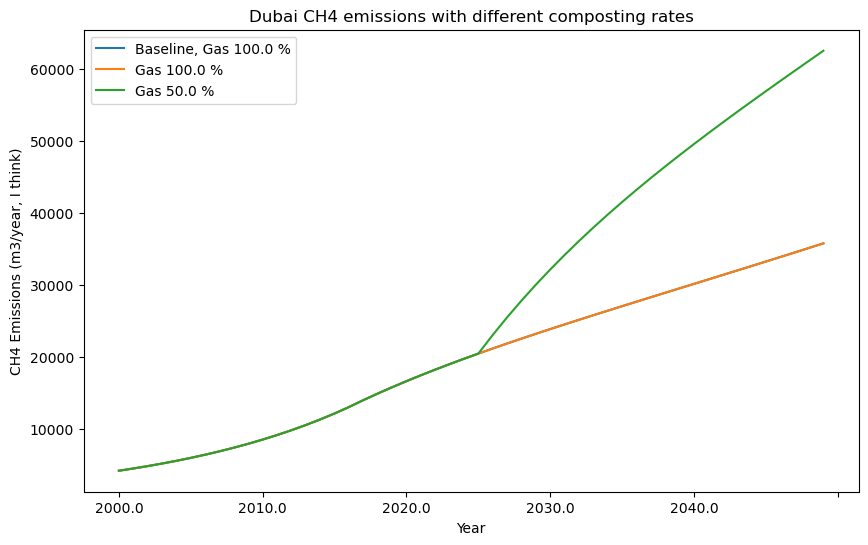

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import time

new_gas_pct = .5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get baseline data
col = pd.Series(baseline_emissions)['2000':'2050'].copy()

# Plot the baseline
col.plot(label=f'Baseline, Gas {baseline_gas_pct * 100} %')

data_dict = {"Baseline": col}

# Start the timer
start_time = time.time()

# Define the parameters
params = {
    "city_name": "Dubai",
    "new_compost": baseline_compost,
    "new_anaerobic": baseline_anaerobic,
    "new_combustion": baseline_combustion,
    "new_recycling": baseline_recycling,
    "new_landfill_pct": baseline_landfill_pct,
    "new_gas_pct": baseline_gas_pct,
    "implement_year": 2025
}

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_implement_dst_changes', params=params)

# Print the response
#print(response.json())

new_col = pd.DataFrame(response.json()).loc['2000':'2050', 'total'].copy()
new_col.plot(label=f'Gas {baseline_gas_pct * 100} %')

data_dict[str(new_landfill_pct)] = new_col

# End the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Update took: {elapsed_time:.2f} seconds")


# Start the timer
start_time = time.time()

# Define the parameters
params = {
    "city_name": "Dubai",
    "new_compost": baseline_compost,
    "new_anaerobic": baseline_anaerobic,
    "new_combustion": baseline_combustion,
    "new_recycling": baseline_recycling,
    "new_landfill_pct": baseline_landfill_pct,
    "new_gas_pct": new_gas_pct,
    "implement_year": 2025
}

# Make the API request
response = requests.get('http://localhost:8000/v1/city_emissions/city_implement_dst_changes', params=params)

# Print the response
#print(response.json())

new_col = pd.DataFrame(response.json()).loc['2000':'2050', 'total'].copy()
new_col.plot(label=f'Gas {new_gas_pct * 100} %')

data_dict[str(new_landfill_pct)] = new_col

# End the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Update took: {elapsed_time:.2f} seconds")


plt.xlabel('Year')
plt.ylabel('CH4 Emissions (m3/year, I think)')
plt.title('Dubai CH4 emissions with different composting rates')
plt.legend(loc='best')

plt.show()

data = pd.DataFrame(data_dict)